# GANs - GENERATIVE ADVERSARIAL NETWORKS



### 1. Load data

#### Load libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [2]:
from tensorflow.keras import initializers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import BatchNormalization, Dense, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

#### Getting the data

In [3]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Explore visual data

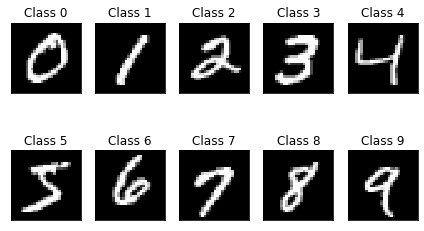

In [4]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

#### Reshaping and normalizing the inputs

In [5]:
print('X_train.shape', X_train.shape)

# reshaping the inputs
X_train = X_train.reshape(60000, 28*28)

# normalizing the inputs (-1, 1)
X_train = (X_train.astype('float32') / 255 - 0.5) * 2

print('X_train reshape:', X_train.shape)

X_train.shape (60000, 28, 28)
X_train reshape: (60000, 784)


### 2. Define model

#### Generator

In [6]:
# latent space dimension
latent_dim = 100

# imagem dimension 28x28
img_dim = 784

init = initializers.RandomNormal(stddev=0.02)

# Generator network
generator = Sequential()

# Input layer and hidden layer 1
generator.add(Dense(128, input_shape=(latent_dim,), kernel_initializer=init))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 2
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Hidden layer 3
generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Output layer 
generator.add(Dense(img_dim, activation='tanh'))

#### Generator model visualization

In [7]:
# prints a summary representation of your model
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                        

#### Discriminator

In [8]:
# Discriminator network
discriminator = Sequential()

# Input layer and hidden layer 1
discriminator.add(Dense(128, input_shape=(img_dim,), kernel_initializer=init))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 2
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 3
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))

# Output layer
discriminator.add(Dense(1, activation='sigmoid'))

#### Discriminator model visualization

In [9]:
# prints a summary representation of your model
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

### 3. Compile model

#### Compile discriminator

In [10]:
# Optimizer
optimizer = Adam(lr=0.0002, beta_1=0.5)

discriminator.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

c:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#### Combined network

In [11]:
discriminator.trainable = False

d_g = Sequential()
d_g.add(generator)
d_g.add(discriminator)
d_g.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [12]:
# prints a summary representation of your model
d_g.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 784)               583312    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 265601    
                                                                 
Total params: 848,913
Trainable params: 581,520
Non-trainable params: 267,393
_________________________________________________________________


### 4. Fit model

epoch = 1/100, d_loss=0.584, g_loss=1.879                                                                                                                                                                                                                          


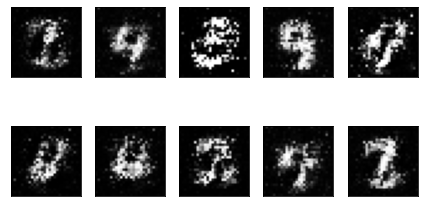

epoch = 2/100, d_loss=0.559, g_loss=1.793                                                                                                                                                                                                                                                                                                                               
epoch = 3/100, d_loss=0.639, g_loss=1.585                                                                                                                                                                                                                                                                                                                               
epoch = 4/100, d_loss=0.615, g_loss=1.358                                                                                                                      
epoch = 5/100, d_loss=0.602, g_loss=1.282                                                                             

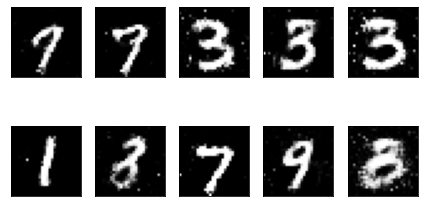

epoch = 12/100, d_loss=0.615, g_loss=1.088                                                                                                                      
epoch = 13/100, d_loss=0.646, g_loss=1.087                                                                                                                                                                                                                          
epoch = 14/100, d_loss=0.562, g_loss=1.039                                                                                                                      
epoch = 15/100, d_loss=0.583, g_loss=1.115                                                                                                                      
epoch = 16/100, d_loss=0.601, g_loss=1.081                                                                                                                      
epoch = 17/100, d_loss=0.565, g_loss=1.100                                                     

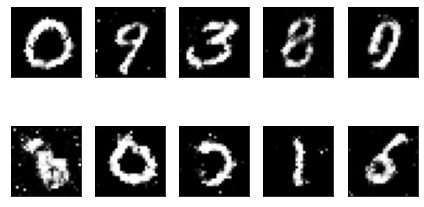

epoch = 22/100, d_loss=0.605, g_loss=0.998                                                                                                                      
epoch = 23/100, d_loss=0.613, g_loss=1.091                                                                                                                                                                                                                           
epoch = 24/100, d_loss=0.632, g_loss=1.166                                                                                                                      
epoch = 25/100, d_loss=0.593, g_loss=1.157                                                                                                                                                                                                                                                                                                                                                                                      

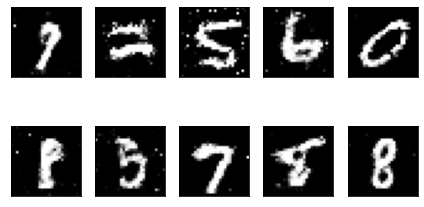

epoch = 32/100, d_loss=0.598, g_loss=1.190                                                                                                                                                                                                                                                                                                                             
epoch = 33/100, d_loss=0.612, g_loss=1.165                                                                                                                      
epoch = 34/100, d_loss=0.617, g_loss=1.175                                                                                                                                                                                                                                                                                                                                                                                                                                  
epoch = 35/100, d_

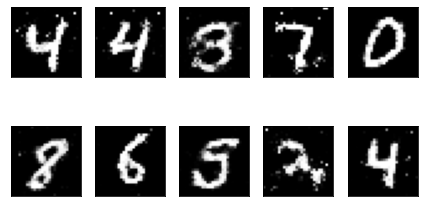

epoch = 42/100, d_loss=0.573, g_loss=1.205                                                                                                                      
epoch = 43/100, d_loss=0.565, g_loss=1.274                                                                                                                      
epoch = 44/100, d_loss=0.567, g_loss=1.254                                                                                                                      
epoch = 45/100, d_loss=0.547, g_loss=1.194                                                                                                                      
epoch = 46/100, d_loss=0.571, g_loss=1.120                                                                                                                      
epoch = 47/100, d_loss=0.574, g_loss=1.126                                                                                                                                                         

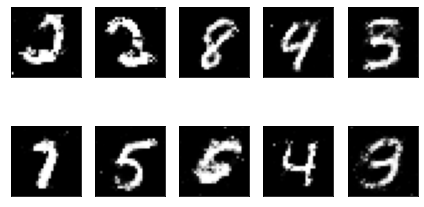

epoch = 52/100, d_loss=0.586, g_loss=1.251                                                                                                                      
epoch = 53/100, d_loss=0.552, g_loss=1.304                                                                                                                      
epoch = 54/100, d_loss=0.534, g_loss=1.349                                                                                                                      
epoch = 55/100, d_loss=0.556, g_loss=1.411                                                                                                                      
epoch = 56/100, d_loss=0.514, g_loss=1.265                                                                                                                                                                                                                          
epoch = 57/100, d_loss=0.543, g_loss=1.449                                                     

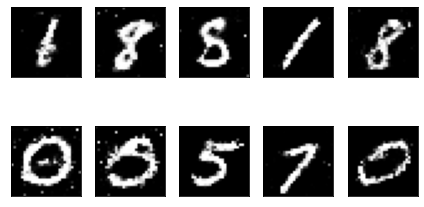

epoch = 62/100, d_loss=0.558, g_loss=1.293                                                                                                                      
epoch = 63/100, d_loss=0.505, g_loss=1.418                                                                                                                      
epoch = 64/100, d_loss=0.498, g_loss=1.359                                                                                                                      
epoch = 65/100, d_loss=0.495, g_loss=1.414                                                                                                                      
epoch = 66/100, d_loss=0.565, g_loss=1.387                                                                                                                      
epoch = 67/100, d_loss=0.506, g_loss=1.404                                                                                                                      
epoch = 68/100, d_loss=0.543, g_lo

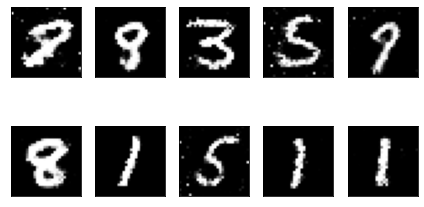

epoch = 72/100, d_loss=0.518, g_loss=1.268                                                                                                                      
epoch = 73/100, d_loss=0.500, g_loss=1.341                                                                                                                      
epoch = 74/100, d_loss=0.560, g_loss=1.540                                                                                                                      
epoch = 75/100, d_loss=0.569, g_loss=1.433                                                                                                                      
epoch = 76/100, d_loss=0.476, g_loss=1.352                                                                                                                      
epoch = 77/100, d_loss=0.490, g_loss=1.457                                                                                                                      
epoch = 78/100, d_loss=0.486, g_lo

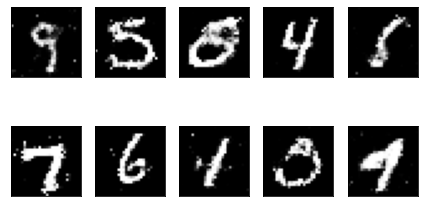

epoch = 82/100, d_loss=0.455, g_loss=1.493                                                                                                                      
epoch = 83/100, d_loss=0.499, g_loss=1.434                                                                                                                                                                                                                          
epoch = 84/100, d_loss=0.489, g_loss=1.627                                                                                                                      
epoch = 85/100, d_loss=0.528, g_loss=1.506                                                                                                                      
epoch = 86/100, d_loss=0.492, g_loss=1.472                                                                                                                      
epoch = 87/100, d_loss=0.508, g_loss=1.462                                                     

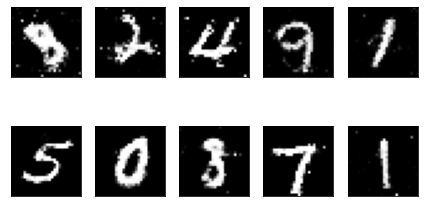

epoch = 92/100, d_loss=0.514, g_loss=1.439                                                                                                                      
epoch = 93/100, d_loss=0.489, g_loss=1.589                                                                                                                      
epoch = 94/100, d_loss=0.511, g_loss=1.394                                                                                                                                                                                                                          
epoch = 95/100, d_loss=0.531, g_loss=1.441                                                                                                                                                                                                                          
epoch = 96/100, d_loss=0.504, g_loss=1.458                                                                                                                  

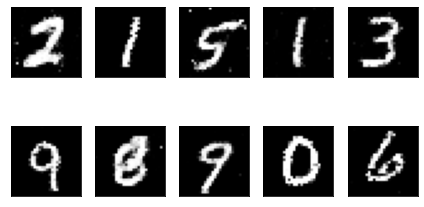

In [13]:
epochs = 100
batch_size = 64
smooth = 0.1

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):

        # Train Discriminator weights
        discriminator.trainable = True

        # Real samples
        X_batch = X_train[i * batch_size : (i + 1) * batch_size]
        d_loss_real = discriminator.train_on_batch(
            x=X_batch, y=real * (1 - smooth)
        )

        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        X_fake = generator.predict_on_batch(z)
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)

        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])

        # Train Generator weights
        discriminator.trainable = False
        d_g_loss_batch = d_g.train_on_batch(x=z, y=real)

        print(
            "epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f"
            % (
                e + 1,
                epochs,
                i,
                len(X_train) // batch_size,
                d_loss_batch,
                d_g_loss_batch[0],
            ),
            100 * " ",
            end="\r",
        )

    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print(
        "epoch = %d/%d, d_loss=%.3f, g_loss=%.3f"
        % (e + 1, epochs, d_loss[-1], d_g_loss[-1]),
        100 * " ",
    )

    if e % 10 == 0:
        samples = 10
        x_fake = generator.predict(
            np.random.normal(loc=0, scale=1, size=(samples, latent_dim))
        )

        for k in range(samples):
            plt.subplot(2, 5, k + 1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap="gray")
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()


### 5. Evaluate model

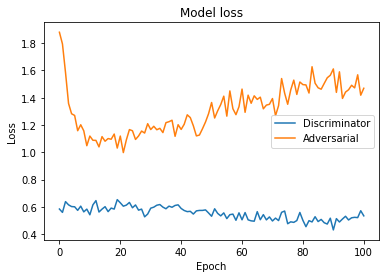

In [14]:
# plotting the metrics
plt.plot(d_loss)
plt.plot(d_g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'], loc='center right')
plt.show()

In [15]:
d_g.save("gan_trained.model")

INFO:tensorflow:Assets written to: gan_trained.model\assets


In [16]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(d_g, "tfjs_gan_model")

In [17]:
generator.save("gan_generator_trained.model")
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(generator, "tfjs_gan_generator_model")

INFO:tensorflow:Assets written to: gan_generator_trained.model\assets
